In [6]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt 

In [7]:
from prophet import Prophet


c:\Users\Yibabe\Desktop\10academy_kifiya-AIMweek-11\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [48]:
df =pd.read_csv(r'C:\Users\Yibabe\Desktop\10academy_kifiya-AIMweek-11\data\cleaned_data.csv')

In [49]:
df.head()

,Date,Adj Close BND,Adj Close SPY,Adj Close TSLA,Close BND,Close SPY,Close TSLA,High BND,High SPY,High TSLA,Low BND,Low SPY,Low TSLA,Open BND,Open SPY,Open TSLA,Volume BND,Volume SPY,Volume TSLA,Daily_Return
0,2015-01-02 00:00:00+00:00,63.358757,173.173737,14.620667,82.650002,205.429993,14.620667,82.690002,206.880005,14.883333,82.419998,204.179993,14.217333,82.430000,206.380005,14.858000,2218800,121465900,71466000,NaN
1,2015-01-05 00:00:00+00:00,63.542767,170.046280,14.006000,82.889999,201.720001,14.006000,82.919998,204.369995,14.433333,82.699997,201.350006,13.810667,82.739998,204.169998,14.303333,5820100,169632600,80527500,-0.018060
2,2015-01-06 00:00:00+00:00,63.726715,168.444626,14.085333,83.129997,199.820007,14.085333,83.379997,202.720001,14.280000,83.029999,198.860001,13.614000,83.029999,202.089996,14.004000,3887600,209151400,93928500,-0.009419
3,2015-01-07 00:00:00+00:00,63.765030,170.543655,14.063333,83.180000,202.309998,14.063333,83.279999,202.720001,14.318667,83.050003,200.880005,13.985333,83.139999,201.419998,14.223333,2433400,125346700,44526000,0.012461
4,2015-01-08 00:00:00+00:00,63.665379,173.569992,14.041333,83.050003,205.899994,14.041333,83.110001,206.160004,14.253333,82.970001,203.990005,14.000667,83.110001,204.009995,14.187333,1873400,147217800,51637500,0.017745


In [50]:
# Drop rows with NaN values
df_clean = df.dropna(subset=['Close TSLA'])

# Split data again after dropping NaN values
train_size = int(0.8 * len(df_clean))
train, test = df_clean['Close TSLA'][:train_size], df_clean['Close TSLA'][train_size:]

# Check the new data shape
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")


Train shape: (1979,)
Test shape: (495,)


In [51]:
# Fit the ARIMA model again
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with optimal p, d, q values
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) values might need tuning
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))


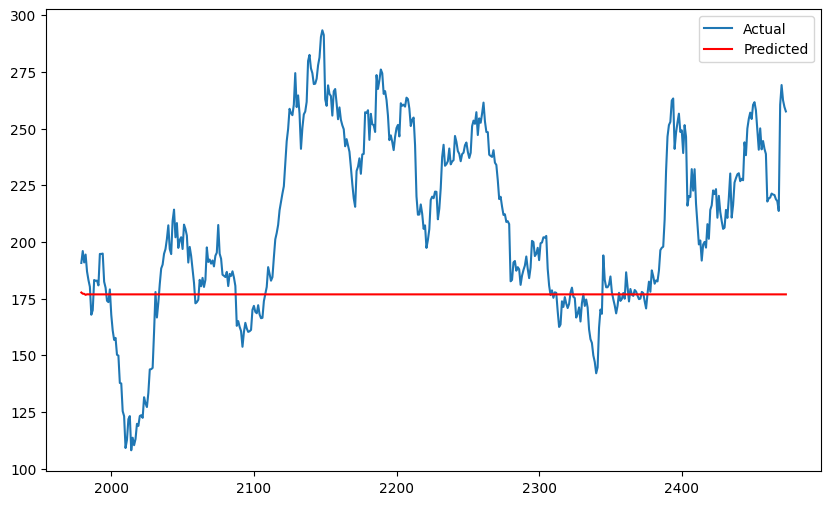

In [52]:
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.legend()
plt.show()

SARIMA (Seasonal ARIMA): model creating 

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model (adjust seasonal_order based on your data)
model_sarima = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

# Make predictions
predictions_sarima = model_sarima_fit.forecast(steps=len(test))

# Evaluate the SARIMA model
mae_sarima = mean_absolute_error(test, predictions_sarima)
rmse_sarima = mean_squared_error(test, predictions_sarima, squared=False)
mape_sarima = mean_absolute_percentage_error(test, predictions_sarima) * 100

print(f"SARIMA MAE: {mae_sarima}")
print(f"SARIMA RMSE: {rmse_sarima}")
print(f"SARIMA MAPE: {mape_sarima}")


SARIMA MAE: 32.05626598369843
SARIMA RMSE: 39.76609147755704
SARIMA MAPE: 15.266630746422733


c:\Users\Yibabe\Desktop\10academy_kifiya-AIMweek-11\env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Interpretation of the Results
MAE (Mean Absolute Error): 32.06
how far off predictions are from the actual values. A lower MAE indicates better accuracy, and in this case, it’s 32, which is fairly reasonable depending on the scale of  my data.


RMSE (Root Mean Squared Error): 39.77
RMSE penalizes larger errors more than MAE. It also suggests that, on average, the model’s predictions are off by about 39.77 units. If the scale of the data is large, this is still an acceptable error.


MAPE (Mean Absolute Percentage Error): 15.27%
This indicates that the model predictions are off by approximately 15.27% on average, which is a relatively good performance. MAPE under 20% is typically considered good for forecasting models.

Plot the residuals: Check if the residuals are random and centered around zero. If they show patterns, the model has not fully captured the structure of the data.

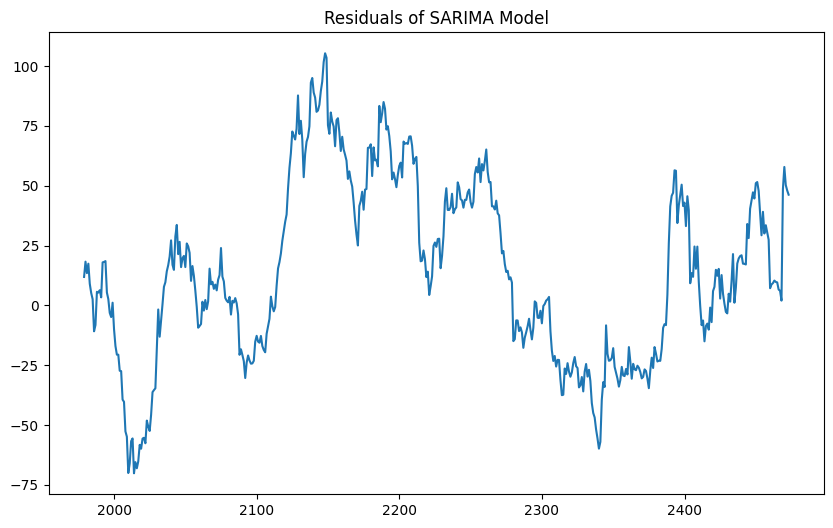

In [57]:
residuals = test - predictions_sarima

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of SARIMA Model')
plt.show()


Check Normality: It’s also useful to check if the residuals are normally distributed (which is an assumption for ARIMA models). we can use a histogram or a Q-Q plot.

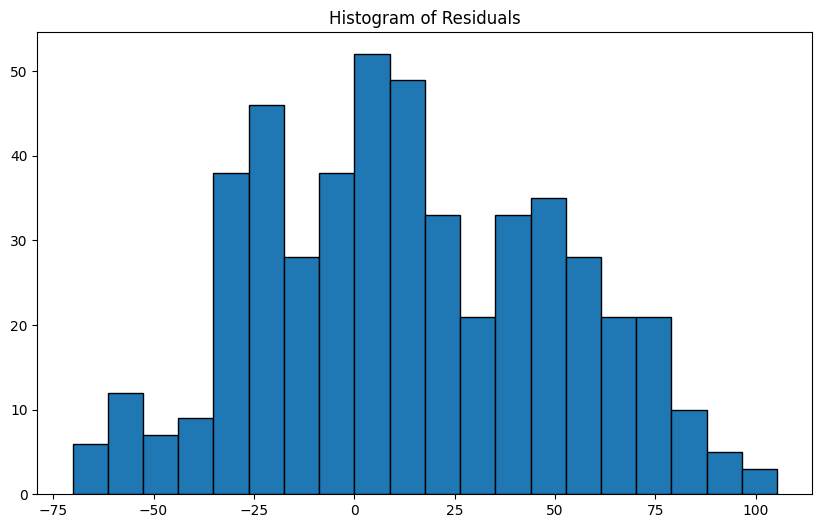

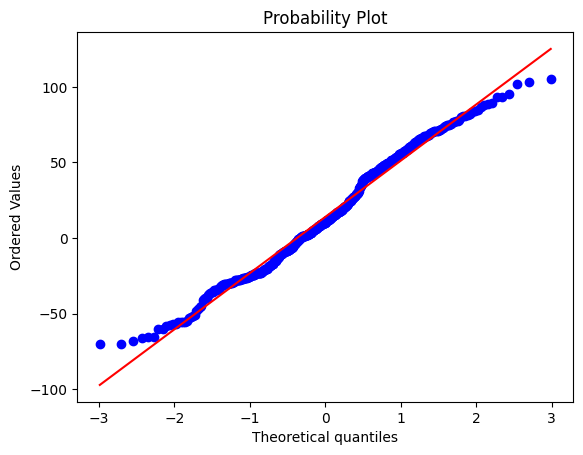

In [58]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

Make Forecasts for the Future

In [63]:
# Forecast the next year days 
forecast_steps = 365
forecast = model_sarima_fit.get_forecast(steps=forecast_steps)

# Get forecasted mean values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()




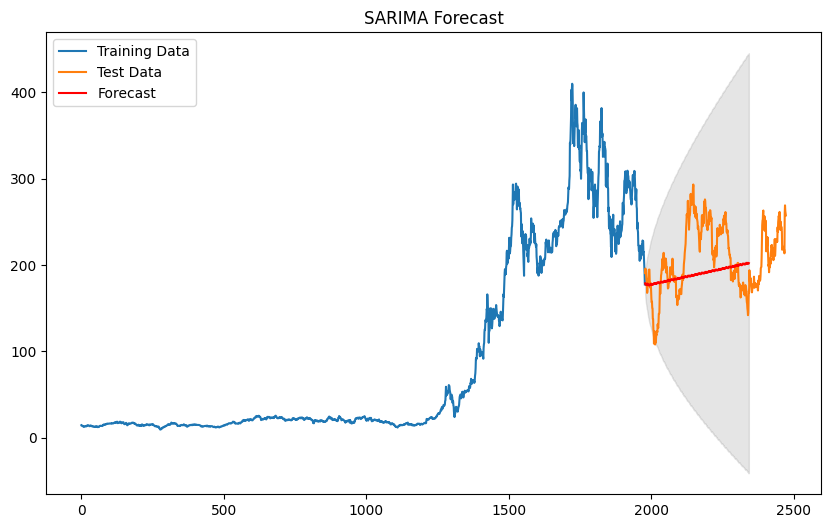

In [64]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title('SARIMA Forecast')
plt.show()

Steps to Implement LSTM for Time Series Forecasting

Data Preprocessing

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the 'Close TSLA' data
scaled_data = scaler.fit_transform(df['Close TSLA'].values.reshape(-1, 1))

In [66]:
# Split the data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


Prepare Data for LSTM
LSTM models require the data to be in sequences. We'll create sequences of a specific time window (e.g., 60 time steps) to predict the next value.

In [69]:
import numpy as np

# Function to create sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Taking previous 'time_step' values
        y.append(data[i, 0])  # The target value is the next value
    return np.array(X), np.array(y)




In [70]:
# Reshape data into sequences
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape data to be in the format [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1919, 60, 1)
X_test shape: (435, 60, 1)


In [75]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Define the LSTM model
# model = Sequential()

# # Adding the first LSTM layer with Dropout regularization
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# # Adding the second LSTM layer
# model.add(LSTM(units=50, return_sequences=False))
# model.add(Dropout(0.2))

# # Adding the output layer
# model.add(Dense(units=1))  # Predicting one value

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Summary of the model
# model.summary()
